In [1]:
#Import Libraries & Load Dataset
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("E:\MS Datascience\Tool and techniques for data science\MSDS25026_Project\Viral_Social_Media_Trends.csv")

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\UMAR\AppData\Local\Temp\ipykernel_15812\2197543727.py:1: SyntaxWarning: invalid escape sequence '\M'
  df=pd.read_csv("E:\MS Datascience\Tool and techniques for data science\MSDS25026_Project\Viral_Social_Media_Trends.csv")


In [3]:
# Dataset structure
df.head()

,Post_ID,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
0,Post_1,TikTok,#Challenge,Video,UK,4163464,339431,53135,19346,High
1,Post_2,Instagram,#Education,Shorts,India,4155940,215240,65860,27239,Medium
2,Post_3,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,Medium
3,Post_4,YouTube,#Education,Shorts,Australia,917951,127125,11687,36806,Low
4,Post_5,TikTok,#Dance,Post,Brazil,64866,171361,69581,6376,Medium


In [4]:
df.tail()

,Post_ID,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
4995,Post_4996,YouTube,#Education,Video,Japan,4258236,381509,59209,4674,High
4996,Post_4997,Instagram,#Education,Video,UK,4841525,166266,54841,4832,Medium
4997,Post_4998,YouTube,#Fashion,Shorts,USA,2004080,32401,75229,33875,Low
4998,Post_4999,Instagram,#Gaming,Shorts,Canada,2221665,46996,12954,42832,Low
4999,Post_5000,Instagram,#Fashion,Reel,Japan,2224007,72744,29945,46381,Low


In [5]:
df.columns

Index(['Post_ID', 'Platform', 'Hashtag', 'Content_Type', 'Region', 'Views',
       'Likes', 'Shares', 'Comments', 'Engagement_Level'],
      dtype='object')

Data Wrangling / Cleansing

Handling Missing Values

In [6]:
df.isnull().sum()          # Count missing values per column
(df.isnull().sum()/len(df))*100   # % of missing values

Post_ID             0.0
Platform            0.0
Hashtag             0.0
Content_Type        0.0
Region              0.0
Views               0.0
Likes               0.0
Shares              0.0
Comments            0.0
Engagement_Level    0.0
dtype: float64

Ploting Missing Values

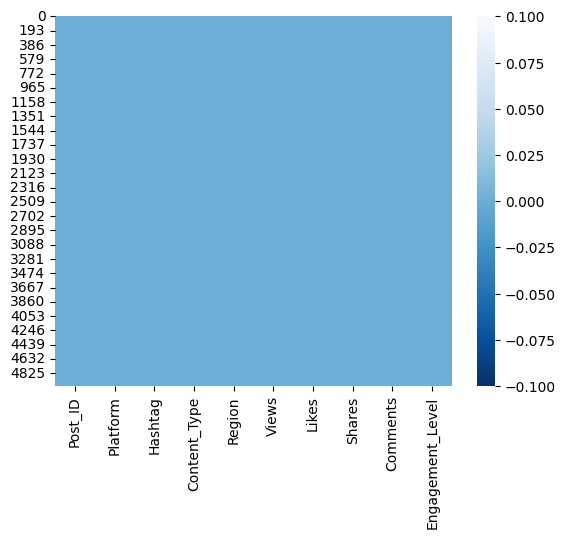

In [7]:
sns.heatmap(df.isna(),cmap='Blues_r')
plt.show()

Remove Duplicates

In [8]:
# Count duplicate rows
num_duplicates = df.duplicated().sum()

# Print in a readable format
print(f"Number of duplicate rows in the dataset: {num_duplicates}")

Number of duplicate rows in the dataset: 0


Fix Inconsistent Categories

In [9]:
categorical_cols = ['Platform', 'Content_Type', 'Region', 'Hashtag']

for col in categorical_cols:
    print(f"Unique values in {col}:")
    print(df[col].unique())
    print("\n")



Unique values in Platform:
['TikTok' 'Instagram' 'Twitter' 'YouTube']


Unique values in Content_Type:
['Video' 'Shorts' 'Post' 'Tweet' 'Live Stream' 'Reel']


Unique values in Region:
['UK' 'India' 'Brazil' 'Australia' 'Japan' 'Germany' 'Canada' 'USA']


Unique values in Hashtag:
['#Challenge' '#Education' '#Dance' '#Comedy' '#Gaming' '#Music' '#Viral'
 '#Fitness' '#Tech' '#Fashion']




Standardize Capitalization

In [10]:
# Fix inconsistent categories
df['Platform'] = df['Platform'].str.strip().str.capitalize()
df['Content_Type'] = df['Content_Type'].str.strip().str.title()
df['Region'] = df['Region'].str.strip().str.title()
df['Hashtag'] = df['Hashtag'].str.strip().str.lower()  # hashtags usually lowercase

print("=== Unique Values AFTER Cleaning ===")
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")
print("\n")

=== Unique Values AFTER Cleaning ===
Platform: ['Tiktok' 'Instagram' 'Twitter' 'Youtube']
Content_Type: ['Video' 'Shorts' 'Post' 'Tweet' 'Live Stream' 'Reel']
Region: ['Uk' 'India' 'Brazil' 'Australia' 'Japan' 'Germany' 'Canada' 'Usa']
Hashtag: ['#challenge' '#education' '#dance' '#comedy' '#gaming' '#music' '#viral'
 '#fitness' '#tech' '#fashion']




Verify Fix

In [12]:
for col in categorical_cols:
    print(f"Updated unique values in {col}:")
    print(df[col].unique())
    print("\n")

Updated unique values in Platform:
['Tiktok' 'Instagram' 'Twitter' 'Youtube']


Updated unique values in Content_Type:
['Video' 'Shorts' 'Post' 'Tweet' 'Live Stream' 'Reel']


Updated unique values in Region:
['Uk' 'India' 'Brazil' 'Australia' 'Japan' 'Germany' 'Canada' 'Usa']


Updated unique values in Hashtag:
['#challenge' '#education' '#dance' '#comedy' '#gaming' '#music' '#viral'
 '#fitness' '#tech' '#fashion']




Remove Columns

In [13]:
# Columns to drop
cols_to_drop = ['Post_ID']

# Drop the columns
df = df.drop(columns=cols_to_drop)

# Verify remaining columns
print("Remaining columns:")
print(df.columns)


Remaining columns:
Index(['Platform', 'Hashtag', 'Content_Type', 'Region', 'Views', 'Likes',
       'Shares', 'Comments', 'Engagement_Level'],
      dtype='object')
